In [6]:
import numpy as np
import pandas as pd
from random import sample
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
# dynamic time warping\n
from dtw import *
import os
url = 'https://raw.githubusercontent.com/lbsbcyborg/Project_Time_Series_Clustering/main/Coseries%20Pozos3.csv'
etiquetas = pd.read_csv('https://raw.githubusercontent.com/AdrianRinconCol/Project_Time_Series_Clustering/main/etiquetas.csv')
dt = pd.read_csv(url)
dt.dropna( inplace=True)
dt1 = pd.DataFrame(dt)


In [9]:
dt1

,DEPTH,GR7-3,GR7-8,GRA-53
1028,1608.92,69.81,95.57,12.09
1029,1609.42,69.69,95.87,12.09
1030,1609.92,71.06,96.05,12.09
1031,1610.42,73.00,95.66,12.09
1032,1610.92,75.69,95.26,12.80
...,...,...,...,...
15171,8680.20,67.63,72.88,95.95
15172,8680.70,70.75,72.19,96.86
15173,8681.20,68.13,75.19,96.71
15174,8681.70,66.88,76.75,98.15


<AxesSubplot:xlabel='DEPTH'>

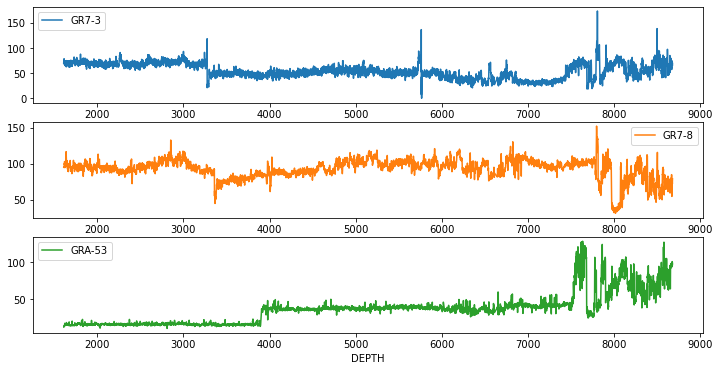

In [13]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize = (12,6))
dt1.plot(x="DEPTH",y="GR7-3", ax = ax1, color = "C0")
dt1.plot(x="DEPTH",y="GR7-8", ax = ax2, color = "C1")
dt1.plot(x="DEPTH",y="GRA-53", ax = ax3, color = "C2")

In [54]:
dt2=dt1[dt1['DEPTH']>=7000]
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 11811 to 15175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   3334 non-null   float64
 1   GR7-3   3334 non-null   float64
 2   GR7-8   3334 non-null   float64
 3   GRA-53  3334 non-null   float64
dtypes: float64(4)
memory usage: 130.2 KB


<AxesSubplot:xlabel='DEPTH'>

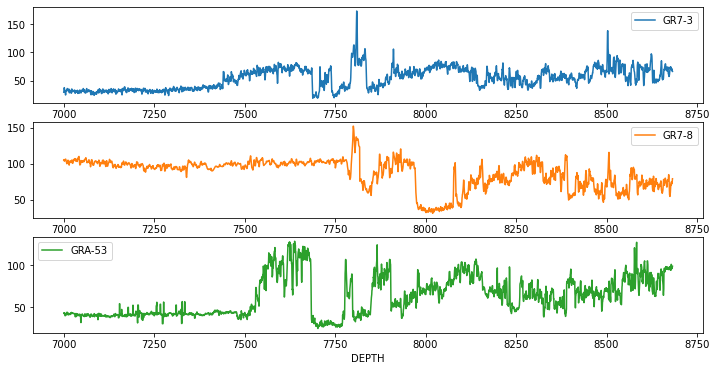

In [55]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize = (12,6))
dt2.plot(x="DEPTH",y="GR7-3", ax = ax1, color = "C0")
dt2.plot(x="DEPTH",y="GR7-8", ax = ax2, color = "C1")
dt2.plot(x="DEPTH",y="GRA-53", ax = ax3, color = "C2")

In [51]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt



Seleccionando la ventana en donde se va examinar el pozo.

In [146]:
m = 100
mp = stumpy.stump(dt2['GR7-3'], m=m)
mp

array([[9.509963023774686, 3007, -1, 3007],
       [9.306155248705627, 3008, -1, 3008],
       [9.334092757676661, 3009, -1, 3009],
       ...,
       [6.5928274394474995, 2555, 2555, -1],
       [6.693258232172237, 2556, 2556, -1],
       [6.804390595110222, 2557, 2557, -1]], dtype=object)

Ubicando el segmento del pozo como inicial para ser comparado en otra sección del pozo

In [148]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

#motif_idx=dt2['DEPTH'].iloc[motif_idx]
#motif_idx2

The motif is located at index 1411


Ubicando el segmento del pozo final que hizo match con la seccción inicial.

In [149]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

#nearest_neighbor_idx2=dt2['DEPTH'].iloc[nearest_neighbor_idx]
#nearest_neighbor_idx2


The nearest neighbor is located at index 1602


Graficando los patrones encontrados junto con su matriz de perfiles.

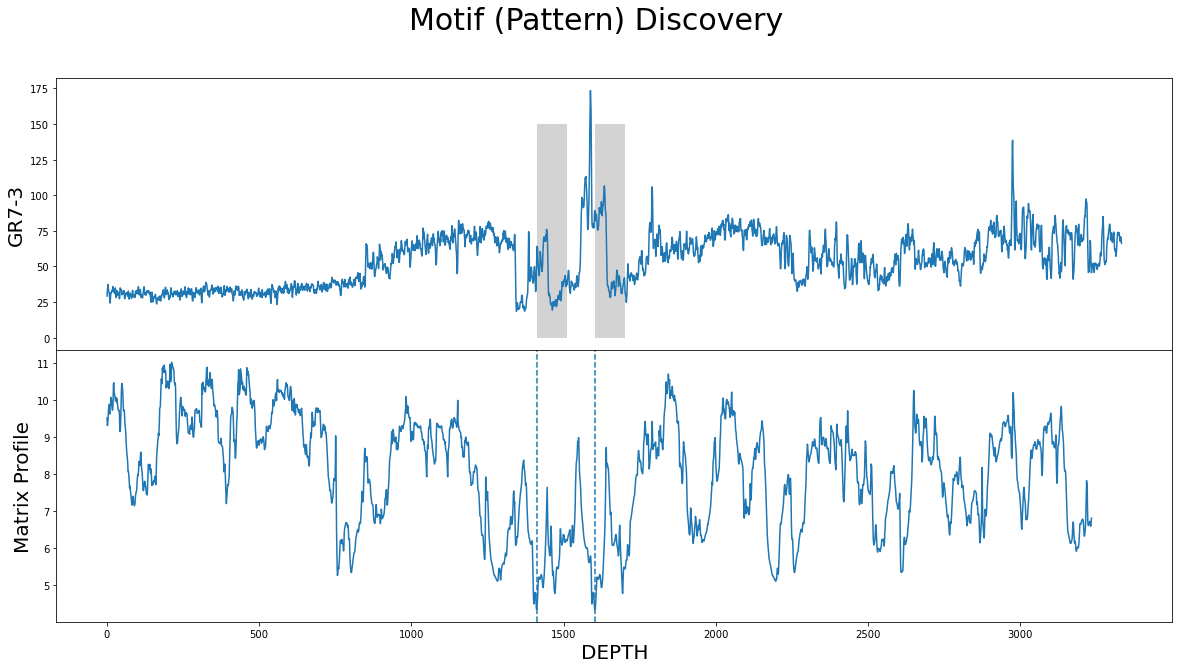

In [150]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0},figsize = (20,10))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(dt2['GR7-3'].values)
axs[0].set_ylabel('GR7-3', fontsize='20')
rect = Rectangle((motif_idx, 0), m,150, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 150, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('DEPTH', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()